In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt

def process_file(filename):            # Define a function to process a single file
    data = np.genfromtxt(filename, skip_header=22)
    events = np.array([data[i:i+501, :] for i in range(0, len(data), 501)])
    for i, event in enumerate(events):
        if i == 0:
            continue
        else:
            event[:, 0] = np.arange(0, 501) * 2e-10
    return events


file_names = glob.glob(r'C:\Users\adele\OneDrive - umontpellier.fr\Documents\TP muons\Données 2023\*')      # Get a list of file names using glob


results = {}                         # Process each file and save the results in dictionary
for filename in file_names:
    results[filename] = process_file(filename)


In [3]:
def plot_event(filename, event_index, results):
    data = results[filename]                # Get the processed data for the specified file
    event = data[event_index]               # Get the specified event from the data
    x = event[:, 0]                         # Extract the x values from the event
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, event[:, 2], label='Signal 2')
    ax.plot(x, event[:, 3], label='Signal 3')
    ax.plot(x, event[:, 4], label='Signal 4')
    
    
    ax.set_xlabel('Time (s)')      
    ax.set_ylabel('Signal')
    ax.set_title(f'Event {event_index} from {filename}')
    
    
    ax.legend()                           
    plt.show()
#plot_event('tp2023-1P.txt', 0, results) #example

In [4]:
#----------------- convolution for each event
def convolve_minima(filename, results, triangular_function):
    data = results[filename]                    # Get the processed data for the specified file
    convol_values = np.zeros((len(data), 501, 4)) # Initialize an array to store the convolved values
    
    for i, event in enumerate(data):            # Loop over the events
        convol_values[i, :, 0] = event[:, 0]    # Copy the original values in column 0
        for j in range(2, 5):                   # Loop over columns 2, 3, and 4
            convolved_signal = np.convolve(event[:, j], triangular_function, mode='same')  # Convolve with the triangular function
            convol_values[i, :, j-1] = convolved_signal  # Store the convolved values in the corresponding column of the convol_values array
    
    return convol_values


In [5]:
# triangular function for convolution
triangular = np.concatenate((np.arange(0, 1, 0.21), np.arange(1, -1, -0.08), np.arange(-1, 0, 0.21))) # change the last value 0.2 to 0.1 to decrease the width
triangular /= np.sum(triangular)  # normalization
triangular2 = 2*triangular         # change the factor to change amplitude

In [6]:
convolved_1P = convolve_minima(r'C:\Users\adele\OneDrive - umontpellier.fr\Documents\TP muons\Données 2023\tp2023-1P', results, triangular2)
convolved_2P = convolve_minima(r'C:\Users\adele\OneDrive - umontpellier.fr\Documents\TP muons\Données 2023\tp2023-2p', results, triangular2)
convolved_1SP = convolve_minima(r'C:\Users\adele\OneDrive - umontpellier.fr\Documents\TP muons\Données 2023\tp20231sp', results, triangular2)
convolved_2SP = convolve_minima(r'C:\Users\adele\OneDrive - umontpellier.fr\Documents\TP muons\Données 2023\tp2023-2sp', results, triangular2)

In [7]:
#print(convolved_1P[0][0])

In [8]:
def find_minima_conv(conv_data):
    min_indices = np.zeros((len(conv_data), 3), dtype=int)  # Initialize arrays to store the minimum indices and values
    min_values = np.zeros((len(conv_data), 3))

    for i, event in enumerate(conv_data):  # Loop over the events and find the indices of the minima in columns 2, 3, and 4
        min_indices[i, 0] = np.argmin(event[:, 1])
        min_indices[i, 1] = np.argmin(event[:, 2])
        min_indices[i, 2] = np.argmin(event[:, 3])

        # Find the corresponding values in column 0
        min_values[i, 0] = event[min_indices[i, 0], 0]
        min_values[i, 1] = event[min_indices[i, 1], 0]
        min_values[i, 2] = event[min_indices[i, 2], 0]

        min_values[i] = np.sort(min_values[i])  # Sort the minimum values in ascending order for the event

    return min_values


In [9]:
min_values_1P = find_minima_conv(convolved_1P)
min_values_2P = find_minima_conv(convolved_2P)
min_values_1SP = find_minima_conv(convolved_1SP)
min_values_2SP = find_minima_conv(convolved_2SP)

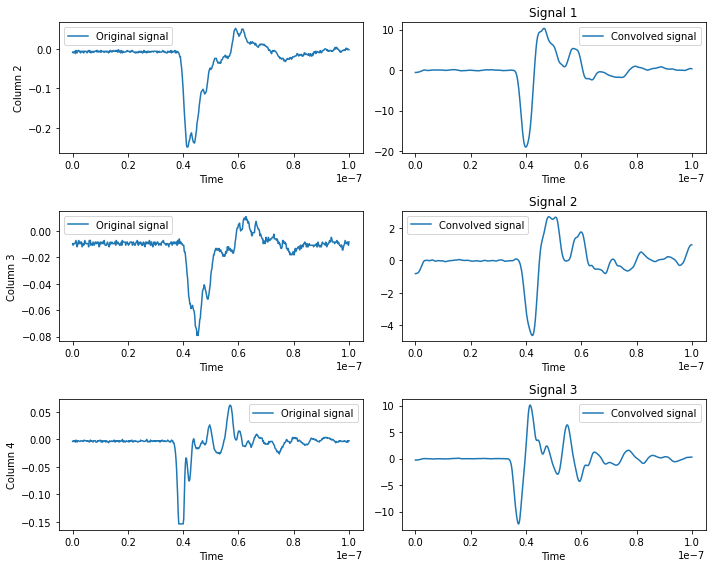

In [10]:
x = convolved_2SP[0][:, 0]
y = convolved_2SP[0][:, 1]
y1 = convolved_2SP[0][:, 2]
y2 = convolved_2SP[0][:, 3]

# Plot the original signal and the convolved signals for each triangular function
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs[0, 0].plot(x, results[r'C:\Users\adele\OneDrive - umontpellier.fr\Documents\TP muons\Données 2023\tp2023-2sp'][0][:,2], label='Original signal')
axs[0, 0].legend()
axs[0, 1].plot(x, y, label='Convolved signal')
axs[0, 1].legend()
axs[0, 1].set_title('Signal 1')

axs[1, 0].plot(x, results[r'C:\Users\adele\OneDrive - umontpellier.fr\Documents\TP muons\Données 2023\tp2023-2sp'][0][:,3], label='Original signal')
axs[1, 0].legend()
axs[1, 1].plot(x, y1, label='Convolved signal')
axs[1, 1].legend()
axs[1, 1].set_title('Signal 2')

axs[2, 0].plot(x, results[r'C:\Users\adele\OneDrive - umontpellier.fr\Documents\TP muons\Données 2023\tp2023-2sp'][0][:,4], label='Original signal')
axs[2, 0].legend()
axs[2, 1].plot(x, y2, label='Convolved signal')
axs[2, 1].legend()
axs[2, 1].set_title('Signal 3')

# Set the x-axis labels for all the plots
for ax in axs.flatten():
    ax.set_xlabel('Time')

# Set the y-axis labels for each group of plots
axs[0, 0].set_ylabel('Column 2')
axs[1, 0].set_ylabel('Column 3')
axs[2, 0].set_ylabel('Column 4')

plt.tight_layout()
plt.show()

# Analysis

In [11]:
def calculate_velocities(min_values, d):
                                   
    velocities = np.zeros((len(min_values), 1))    # Initialize an array to store the velocities
    if d== 0.5:
        for i, row in enumerate(min_values):       #Loop over the rows of the min_values array and calculate the velocity for each row
            velocity = d / (row[2] - row[0])       # Calculate the velocity based on the formula you described
            velocities[i, 0] = velocity            # Store the velocity in the velocities array
    elif d==0.3:
        for i, row in enumerate(min_values):       
            velocity = d / (row[2] - row[1])      
            velocities[i, 0] = velocity
    else:
        for i, row in enumerate(min_values):       
            velocity = d / (row[1] - row[0])
            velocities[i, 0] = velocity       
    return velocities

In [178]:
d2_3 = 0.3       # distance 2nd to 3rd
d1_3 = 0.5      # distance 1st to 3rd
d1_2 = 0.2
c = 2.99792458*10**8

In [179]:
velocities_1P_12 = calculate_velocities(min_values_1P, d1_2)
velocities_1P_23 = calculate_velocities(min_values_1P, d2_3)
velocities_1P_13 = calculate_velocities(min_values_1P, d1_3)

velocities_2P_12 = calculate_velocities(min_values_2P, d1_2)
velocities_2P_23 = calculate_velocities(min_values_2P, d2_3)
velocities_2P_13 = calculate_velocities(min_values_2P, d1_3)

velocities_1SP_13 = calculate_velocities(min_values_1SP, d1_3)
velocities_1SP_12 = calculate_velocities(min_values_1SP, d1_2)
velocities_1SP_23 = calculate_velocities(min_values_1SP, d2_3)

velocities_2SP_13 = calculate_velocities(min_values_2SP, d1_3)
velocities_2SP_12 = calculate_velocities(min_values_2SP, d1_2)
velocities_2SP_23 = calculate_velocities(min_values_2SP, d2_3)


c:\users\adele\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
c:\users\adele\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
c:\users\adele\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


In [180]:
# Eliminate values greater than speed of light
velocities_2P_12 = velocities_2P_12[velocities_2P_12 < c]
velocities_2P_23 = velocities_2P_23[velocities_2P_23 < c]
velocities_2P_13 = velocities_2P_13[velocities_2P_13 < c]

velocities_1P_12 = velocities_1P_12[velocities_1P_12 < c]
velocities_1P_23 = velocities_1P_23[velocities_1P_23 < c]
velocities_1P_13 = velocities_1P_13[velocities_1P_13 < c]

velocities_2SP_12 = velocities_2SP_12[velocities_2SP_12 < c]
velocities_2SP_13 = velocities_2SP_13[velocities_2SP_13 < c]
velocities_2SP_23 = velocities_2SP_23[velocities_2SP_23 < c]

velocities_1SP_12 = velocities_1SP_12[velocities_1SP_12 < c]
velocities_1SP_13 = velocities_1SP_13[velocities_1SP_13 < c]
velocities_1SP_23 = velocities_1SP_23[velocities_1SP_23 < c]


In [181]:
print(len(velocities_2P_12), len(velocities_2P_23), len(velocities_1P_12), len(velocities_1P_23), len(velocities_2SP_13), len(velocities_1SP_13))

3436 2120 3360 2124 3229 3274


In [182]:
mean_velocities_1P_12 = np.mean(velocities_1P_12)
mean_velocities_1P_23 = np.mean(velocities_1P_23)
mean_velocities_1P_13 = np.mean(velocities_1P_13)

mean_velocities_2P_12 = np.mean(velocities_2P_12)
mean_velocities_2P_23 = np.mean(velocities_2P_23)
mean_velocities_2P_13 = np.mean(velocities_2P_13)

mean_velocities_1SP_12 = np.mean(velocities_1SP_12)
mean_velocities_1SP_13 = np.mean(velocities_1SP_13)
mean_velocities_1SP_23 = np.mean(velocities_1SP_23)

mean_velocities_2SP_12 = np.mean(velocities_2SP_12)
mean_velocities_2SP_13 = np.mean(velocities_2SP_13)
mean_velocities_2SP_23 = np.mean(velocities_2SP_23)

mean_p = (mean_velocities_1P_23 + mean_velocities_2P_23+mean_velocities_1P_12 + mean_velocities_2P_12)/4
mean_sp = (mean_velocities_1SP_13+ mean_velocities_2SP_13)/2

In [185]:
print(mean_p, mean_sp)

165108303.59138075 189128720.67465824


In [186]:
beta_P = mean_p/c
beta_SP = mean_sp/c

gamma_P = 1/np.sqrt(1-beta_P**2)
gamma_SP = 1/np.sqrt(1-beta_SP**2)

In [187]:
print(beta_P, beta_SP)
print(gamma_P, gamma_SP)

0.5507420189716071 0.6308655058782641
1.1980703549541316 1.288838828118144


In [188]:
print(beta_P-beta_SP)

-0.08012348690665694


# Uncertainty

In [213]:
def incer_traj(d, long):
    #theta = np.arctan(long/d)
    #incer_traj = d*(1-np.cos(theta))/np.cos(theta)
    incer_traj = np.sqrt(d**2+long**2)-d
    return incer_traj

def velo_uncertainty(min_values, velocities, incer_distance, incer_temps, d):
    # Calculate the systematic uncertainty for each measurement
    sysUncertainty = np.zeros_like(velocities)
    if len(velocities)== 3436 or len(velocities)==3360:
        for i in range(len(velocities)):
            if min_values[i, 1]-min_values[i, 0] == 0.:
                sysUncertainty[i]=0.
            else:
                sysUncertainty[i] = (incer_distance/d + incer_temps/(min_values[i, 1]-min_values[i, 0])) * velocities[i]
    elif len(velocities)==2439 or len(velocities)==2447:
        for i in range(len(velocities)):
            if min_values[i, 2]-min_values[i, 1] == 0.:
                sysUncertainty[i]=0.
            else:
                sysUncertainty[i] = (incer_distance/d + incer_temps/(min_values[i, 2]-min_values[i, 1])) * velocities[i]
    else:
        for i in range(len(velocities)):
            if min_values[i, 2]-min_values[i, 0] == 0.:
                sysUncertainty[i]=0.
            else:
                sysUncertainty[i] = (incer_distance/d + incer_temps/(min_values[i, 2]-min_values[i, 0])) * velocities[i]
    return sysUncertainty


def calc_gamma(array, cel):
    # Divide by c
    array_divided = array / cel
    gamma = 1 / np.sqrt(1 - array_divided**2)

    return gamma

def uncertainty_gamma(gam, velocities, uncer_vel, cel):
    # Calculate the systematic uncertainty for each measurement
    gamma_uncer = np.zeros_like(gam)
    for i in range(len(velocities)):
        gamma_uncer[i] = (gam[i]**3)*velocities[i]*uncer_vel[i]/c**2
                
    return gamma_uncer

In [214]:
long = 0.361
incer_entre_raquettes = 0.005
incer_temps = 2*10**(-10)

In [215]:
# Uncertainties for each distance
incer_traj_12 = incer_traj(d1_2, long)
incer_traj_23 = incer_traj(d2_3, long)
incer_traj_13 = incer_traj(d1_3, long)

# Total uncertainty for each distance
incer_distance_12 = incer_entre_raquettes + incer_traj_12
incer_distance_13 = incer_entre_raquettes + incer_traj_13
incer_distance_23 = incer_entre_raquettes + incer_traj_23

print((incer_distance_12/d1_2)*173343727.6927374)

188684343.07632613


In [216]:
# Uncertainty for speed
sys_uncer_1P_12 = velo_uncertainty(min_values_1P, velocities_1P_12, incer_distance_12, incer_temps, d1_2)
sys_uncer_1P_23 = velo_uncertainty(min_values_1P, velocities_1P_23, incer_distance_23, incer_temps, d2_3)

sys_uncer_2P_12 = velo_uncertainty(min_values_2P, velocities_2P_12, incer_distance_12, incer_temps, d1_2)
sys_uncer_2P_23 = velo_uncertainty(min_values_2P, velocities_2P_23, incer_distance_23, incer_temps, d2_3)


sys_uncer_1SP = velo_uncertainty(min_values_1SP, velocities_1SP_13, incer_distance_13, incer_temps, d1_3)
sys_uncer_2SP = velo_uncertainty(min_values_2SP, velocities_2SP_13, incer_distance_13, incer_temps, d1_3)

In [217]:
print(len(sys_uncer_1P_12))

3360


In [218]:
#  Remove zero values
mask1 = sys_uncer_1P_12 != 0.
mask2 = sys_uncer_1P_23 != 0.
mask3 = sys_uncer_2P_12 != 0.
mask4 = sys_uncer_2P_23 != 0.
mask5 = sys_uncer_1SP != 0.
mask6 = sys_uncer_2SP != 0.

sys_uncer_1P_12_filtered = sys_uncer_1P_12[mask1]
sys_uncer_1P_23_filtered = sys_uncer_1P_23[mask2]
sys_uncer_2P_12_filtered = sys_uncer_2P_12[mask3]
sys_uncer_2P_23_filtered = sys_uncer_2P_23[mask4]
sys_uncer_1SP_filtered = sys_uncer_1SP[mask5]
sys_uncer_2SP_filtered = sys_uncer_2SP[mask6]


In [219]:
print(sys_uncer_1P_23_filtered[0:100])

[7.79323870e+07 1.34300001e+08 1.00828183e+08 9.79061049e+07
 1.45988313e+08 9.46918192e+07 1.48369266e+08 1.41043258e+08
 5.61912662e+07 7.81278795e+07 1.24614774e+08 9.63107447e+07
 1.55864774e+08 1.57819699e+08 9.96918192e+07 1.10768688e+08
 1.45988313e+08 5.47979255e+06 1.56683335e+08 1.30213132e+08
 1.39865864e+08 7.25651356e+07 1.07296466e+08 7.24135938e+07
 5.88565662e+07 1.07990910e+08 8.57587967e+07 1.68046971e+08
 8.30765160e+07 1.44040261e+08 1.81033984e+08 1.27739774e+08
 1.32427274e+08 6.30176143e+07 1.55171987e+08 1.17713132e+08
 8.63013994e+07 1.60944699e+08 4.68030274e+06 9.06289265e+07
 1.02191819e+08 1.29823107e+08 1.58477593e+08 8.65487382e+07
 1.38845456e+08 1.73097476e+08 1.55736365e+08 1.39865864e+08
 8.47198356e+07 7.47945461e+07 1.58477593e+08 1.24614774e+08
 1.17191819e+08 1.13356199e+08 1.73097476e+08 1.66153032e+08
 5.63520315e+06 1.61986365e+08 1.37191819e+08 1.48369266e+08
 1.34763823e+08 9.01475532e+07 1.37952599e+08 1.17713132e+08
 1.64550468e+08 2.286530

In [220]:
# Average of the uncertainty for each set of speed
N_1P_12 = len(sys_uncer_1P_12_filtered)
N_1P_23 = len(sys_uncer_1P_23_filtered)
N_2P_12 = len(sys_uncer_2P_12_filtered)
N_2P_23 = len(sys_uncer_2P_23_filtered)
N_1SP = len(sys_uncer_1SP_filtered)
N_2SP = len(sys_uncer_2SP_filtered)


SysUncertainty_avg_1P_12 = (1/N_1P_12) * np.sum(sys_uncer_1P_12_filtered)
SysUncertainty_avg_1P_23 = (1/N_1P_23) * np.sum(sys_uncer_1P_23_filtered)
SysUncertainty_avg_2P_12 = (1/N_2P_12) * np.sum(sys_uncer_2P_12_filtered)
SysUncertainty_avg_2P_23 = (1/N_2P_23) * np.sum(sys_uncer_2P_23_filtered)

SysUncertainty_avg_1SP = (1/N_1SP) * np.sum(sys_uncer_1SP_filtered)
SysUncertainty_avg_2SP = (1/N_2SP) * np.sum(sys_uncer_2SP_filtered)

In [221]:
print(SysUncertainty_avg_1P_12,SysUncertainty_avg_1P_23, SysUncertainty_avg_2P_12, SysUncertainty_avg_2P_23, SysUncertainty_avg_1SP,SysUncertainty_avg_2SP)

213470440.96997064 123713086.99849442 212628575.65928861 123312620.03218436 68927500.68049958 70939784.8515079


In [222]:
gamma_1P_12 = calc_gamma(velocities_1P_12, c)
gamma_1P_23 = calc_gamma(velocities_1P_23, c)
gamma_2P_12 = calc_gamma(velocities_2P_12, c)
gamma_2P_23 = calc_gamma(velocities_2P_23, c)


gamma_1SP = calc_gamma(velocities_1SP_13, c)
gamma_2SP = calc_gamma(velocities_2SP_13, c)

In [223]:
print(gamma_1P_23[0:100])
print(velocities_1P_23[0:100])

[1.05280162 1.42990089 1.15496718 1.15496718 1.42990089 1.15496718
 1.42990089 1.15496718 1.42990089 1.0463463  1.060752   1.28159429
 1.12288532 1.28159429 1.81192214 1.15496718 1.20304758 1.42990089
 1.00036993 1.81192214 1.20304758 1.42990089 1.08346361 1.20304758
 1.060752   1.04102716 1.20304758 1.12288532 1.81192214 1.10019827
 1.42990089 1.81192214 1.28159429 1.28159429 1.05280162 1.42990089
 1.20304758 1.08346361 1.81192214 1.00035434 1.12288532 1.15496718
 1.28159429 1.81192214 1.10019827 1.42990089 1.81192214 1.81192214
 1.42990089 1.12288532 1.060752   1.81192214 1.28159429 1.15496718
 1.12288532 1.81192214 1.81192214 1.00035434 1.81192214 1.15496718
 1.42990089 1.42990089 1.08346361 1.42990089 1.20304758 1.81192214
 1.81192214 1.42990089 1.81192214 1.20304758 1.02965256 1.81192214
 1.28159429 1.07071517 1.42990089 1.07071517 1.28159429 1.28159429
 1.00035815 1.42990089 1.28159429 1.42990089 1.10019827 1.12288532
 1.42990089 1.81192214 1.20304758 1.42990089 1.28159429 1.4299

In [224]:
gamma_uncer_1P_12 = uncertainty_gamma(gamma_1P_12, velocities_1P_12, sys_uncer_1P_12, c)
gamma_uncer_1P_23 = uncertainty_gamma(gamma_1P_23, velocities_1P_23, sys_uncer_1P_23, c)

gamma_uncer_2P_12 = uncertainty_gamma(gamma_2P_12, velocities_2P_12, sys_uncer_2P_12, c)
gamma_uncer_2P_23 = uncertainty_gamma(gamma_2P_23, velocities_2P_23, sys_uncer_2P_23, c)

gamma_uncer_1SP = uncertainty_gamma(gamma_1SP, velocities_1SP_13, sys_uncer_1SP, c)
gamma_uncer_2SP = uncertainty_gamma(gamma_2SP, velocities_2SP_13, sys_uncer_2SP, c)

In [225]:
print(np.sum(gamma_uncer_1SP), np.sum(gamma_uncer_2P_23))

3375.4551849729114 2023.784456799065


In [226]:
N_1P_12_gamma = len(gamma_uncer_1P_12)
N_1P_23_gamma = len(gamma_uncer_1P_23)
N_2P_12_gamma = len(gamma_uncer_2P_12)
N_2P_23_gamma = len(gamma_uncer_2P_23)
N_1SP_gamma = len(gamma_uncer_1SP)
N_2SP_gamma = len(gamma_uncer_2SP)

gamma_uncer_avr_1P_12 =  np.sum(gamma_uncer_1P_12)/N_1P_12_gamma
gamma_uncer_avr_1P_23 =  np.sum(gamma_uncer_1P_23)/N_1P_23_gamma

gamma_uncer_avr_2P_12 = np.sum(gamma_uncer_2P_12)/N_2P_12_gamma
gamma_uncer_avr_2P_23 = np.sum(gamma_uncer_2P_23)/N_2P_23_gamma

gamma_uncer_avr_1SP = np.sum(gamma_uncer_1SP)/N_1SP_gamma
gamma_uncer_avr_2SP = np.sum(gamma_uncer_2SP)/N_2SP_gamma

In [227]:
print(gamma_uncer_avr_1P_23, gamma_uncer_avr_2P_23,gamma_uncer_avr_1P_12,gamma_uncer_avr_2P_12,gamma_uncer_avr_1SP,gamma_uncer_avr_2SP)

0.9682456968877843 0.9546153098108797 1.3421309347813781 1.3356396210518897 1.0309881444633204 1.1645838852736228


In [231]:
incert_v1=( SysUncertainty_avg_1SP+SysUncertainty_avg_2SP)/2
incert_v2=(SysUncertainty_avg_1P_12+SysUncertainty_avg_1P_23+SysUncertainty_avg_2P_12+SysUncertainty_avg_2P_23)/4

incert_gammaP=(gamma_uncer_avr_1P_12+gamma_uncer_avr_1P_23+gamma_uncer_avr_2P_12+gamma_uncer_avr_2P_23)/4
incert_gammaSP=(gamma_uncer_avr_1SP+gamma_uncer_avr_2SP)/2

print(incert_v1, incert_v2,incert_gammaP,incert_gammaSP)

69933642.76600374 168281180.91498452 1.150157890632983 1.0977860148684715


# Calcul de la masse

In [244]:
#Valeurs des constantes
Z=82
A=207
rho=11.33
E=14.3996*10**(-8)
Na=6.0221408e+23 
me=511*10**3
c = 2.99792458*10**8
I=10*Z #On utilise ici la loi de Bloch qui dit que I=10 eV*Z pour un matériau de nb atomique z
d_plomb=3.5

#valeurs des gamma et v:
v_1=mean_sp
v_2=mean_p

gamma_1=1/np.sqrt(1-(v_1/c)**2)
gamma_2=1/np.sqrt(1-(v_2/c)**2)


B= np.pi*4*Z*rho*Na*E**2*(np.log(2*me*((v_1/c)**2)*(gamma_1**2)/I)-(v_1/c)**2)/(me*A*(v_1/c)**2)  #Bethe-Bloch en eV/cm

m=B*d_plomb/(gamma_1-gamma_2) #masse du muon en eV
print(m*10**(-6))  #masse du muon en MeV
#La vraie masse du muon est 105.66 MeV

843.3832475176931


In [246]:
#incertitude de la masse
incert_dplomb=0.5

incert_m=abs((np.pi*4*Z*rho*Na*E**2/(me*A))*((2*c**2/v_1**3)*(1-(np.log(2*me*((v_1/c)**2)*(gamma_1**2)/I)-(v_1/c)**2))-2/v_1))*d_plomb*incert_v1/(gamma_1-gamma_2)+(np.pi*4*Z*rho*Na*E**2/(me*A*(v_1/c)**2))*d_plomb*abs((2/gamma_1)*(1/(gamma_1-gamma_2))-((np.log(2*me*((v_1/c)**2)*(gamma_1**2)/I)-(v_1/c)**2)/(gamma_1-gamma_2)**2))*incert_gammaSP+(np.pi*4*Z*rho*Na*E**2/(me*A*(v_1/c)**2))*(np.log(2*me*((v_1/c)**2)*(gamma_1**2)/I)-(v_1/c)**2)*(d_plomb*incert_gammaP+incert_dplomb)/(gamma_1-gamma_2)**2
print(incert_m*10**(-6))#incertitude en MeV

22551.132501385382
